# Introduction
This file has some key concepts on installation and working of plotly.
## Imports
Let us begin by importing some stuff that takes care of pesky rendering issues of plotly

In [1]:
import plotly.io as pio
pio.renderers.default = 'iframe' # Default for interactivity. Does not work on jupyter though!

In [2]:
# Jupyter notebooks don't show 'jupyterlab' renderer. So let's overcome it.
import IPython as ipy

print(ipy.get_ipython().__class__.__name__) # this shows the class name

if ipy.get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
    pio.renderers.default = 'iframe'

ZMQInteractiveShell


In [3]:
# Not needed if style.css is not being used.
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

# Displaying figures with Plotly

Ref: [Plotly renderers](https://plot.ly/python/renderers/)

There are three general approaches to displaying plotly figures:

1. Using the renderers framework in the context of a script or a notebook
2. Using Dash in a web app context
3. Using `FigureWidget` in an ipywidget context

## Renderers framework

Renderers framework can be used by `.show` method which is called on a graph object figure, or passing the figure to `plotly.io.show` function.

In [4]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure displayed with fig.show()"
)
# fig.show() # For inline rendering in notebook. Fails in Github!
fig.show() # For inline rendering in notebook in Github

Next, we will show how to configure the default renderer. After that, we will describe all of the built-in renderers and when to use what.
> `Notes`: 
   - Renderers framework is a generalization of `plotly.offline.iplot` and 'plotly.offline.plot` functions used before version 4. It is still backward compatible.
   - Default renderers persist for the duration of a single session, but they do not persist across sessions - including ipython kernel restarts.

In [5]:
# Show the renderers available
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'iframe'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [6]:
pio.renderers.default # shows as 'vscode', if it is run from within VS Code, shows 'plotly_mimetype+notebook' for jupyter run through CMD.

'iframe'

In [7]:
# set the default renderer, for e.g. to vscode ...
pio.renderers.default = "vscode"
pio.renderers.default

'vscode'

Renderers can be changed just while showing the figure. 

* However, note that renderer='browser' pulls up default browers and could be very slowwww...

Possibilities are given below:

In [8]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure displayed with fig.show()"
)

# fig.show(renderer='svg') # will not work if Kaleido is not installed!
fig.show(renderer='browser')


## Dash and ipywidgets
[Dash](https://dash.plot.ly/introduction) is the best way to render dynamic plots.
   - We will open a separate jupyter notebook for dash, since it is more complicated.

[ipywidgets](https://plot.ly/python/figurewidget/) using FigureWidget are also available.


# Creating and Updating Figures from Python
Ref: [Link for creating and updating figures](https://plot.ly/python/creating-and-updating-figures/)

In Plotly.js, a `figure` is specificed by a declarative JSON data structure. So, plotly.py produces Python dictionaries that can be serialized into JSON structure to represent a valid figure.

## Hierarchy
The dictionaries' basic hierarchy is as follows:

```figure
  |_____ data key____ [trace spec 1  {"type" key: <"bar">|<"scatter">|"box"|...} + 
  |               |                   {"properties of type" key: <"name": string>|
  |               |                                              <"visible": True | False | "legendonly">|
  |               |                                               ...}
  |               |
  |               |__  trace spec 2
  |               |__  trace spec 3]
  |
  |
  |_____ layout ______{"title": {"font": {"family": string
                                          "size": >=1
                                          "color": colorstring}},
                       "showlegend": True | False,
                       ...}
  
```

The [full reference page](https://plot.ly/python/reference/) has all the descriptions of trace and layout options.


There are 3 different ways of creating figures in plolty:

1. Using **Constructor**
2. Using **Plotly Express**
3. Assembled using **Plotly Factory**

Let us see how these things work:

## 1. Constructor

### a) Using low-level dictionary with plotly.io.show

Below is an example:

In [9]:
fig = {
    "data": [{"type": "bar",
              "x": [1, 2, 3],
              "y": [1, 3, 2]}],
    "layout": {"title": {"text": "A Bar Chart"}}
}

# To display the figure defined by this dict, use the low-level plotly.io.show function
import plotly.io as pio
# pio.show(fig) # Will fail in Github!
pio.show(fig, 'browser') # Will render in a separate browser! Takes a long time, if browser is not active!!

Here is another way of representing data using low level dictionary and plotted with low-level `plotly.io.show`

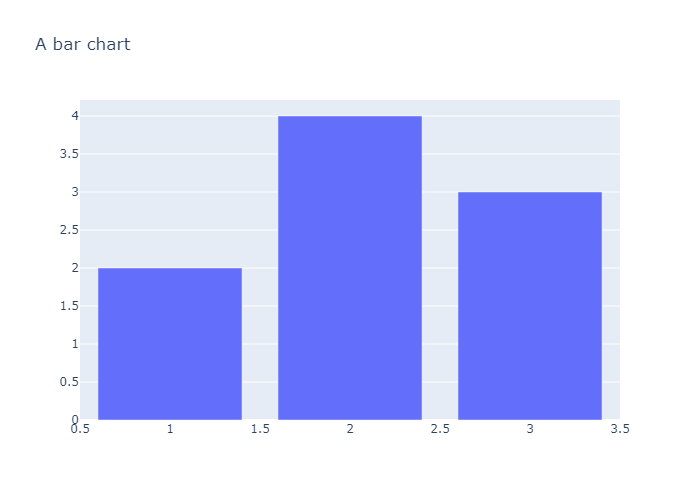

In [10]:
# set the trace
trace_type = 'bar'
x = [1, 3, 2]
y = [2, 3, 4]

# set the layout
layout_text = 'A bar chart'
layout_title = dict(text=layout_text)

# prepare the data and layout dictionaries
data = dict(type=trace_type, x=x, y=y)
layout = dict(title=layout_title)

# make the figure
fig = dict(data=data, layout=layout)

# plot the figure

import plotly.io as pio
pio.show(fig, renderer='png')

### `Note` that the following will not work
## fig here is just a dictionary, and not a graphic object
# fig.show('svg') # <--- will fail with `AttributeError: 'dict' object has no attribute 'show'`

### b) Using figures as graph objects

Advantages of using graph objects are:

1. Data validation is provided. Invalid property values raise exceptions with helpful messages.
2. Descriptions of each property is given in docstrings - so no need of *Full Reference*
3. Graph objects can be accessed using:
   - dictionary-style key lookup `(e.g. fig["layout"])`
   - or class-style property access `(e.g. fig.layout)`
4. Graph objects have pre-consturcted figures, making `updates` to them easier.

Here are a few examples

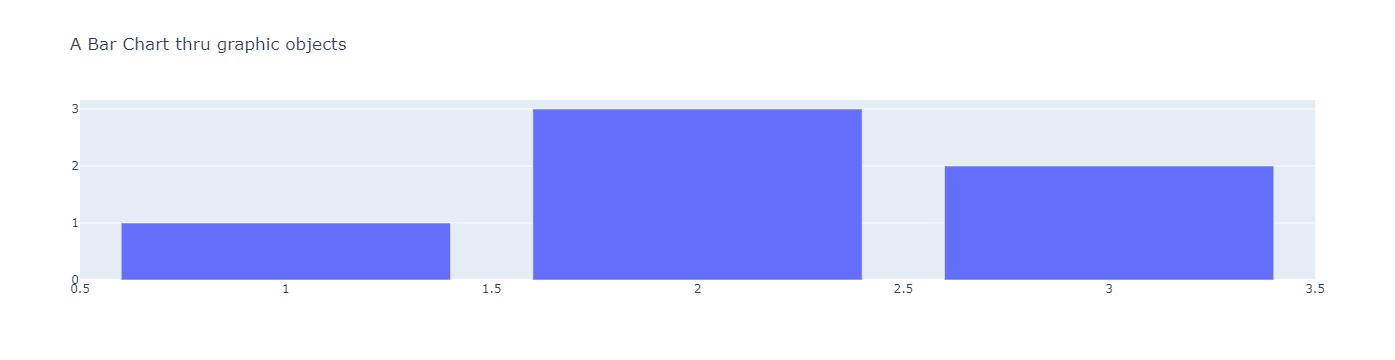

In [11]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=[1, 2, 3], y=[1, 3,2])],
    layout=go.Layout(title=go.layout.Title(text="A Bar Chart thru graphic objects"))
    # layout=go.Layout(title="A Bar Chart thru graphic objects") ...without go.layout.Title also works!
)
fig.show()

### c) Using graph objects mixed with dictionaries

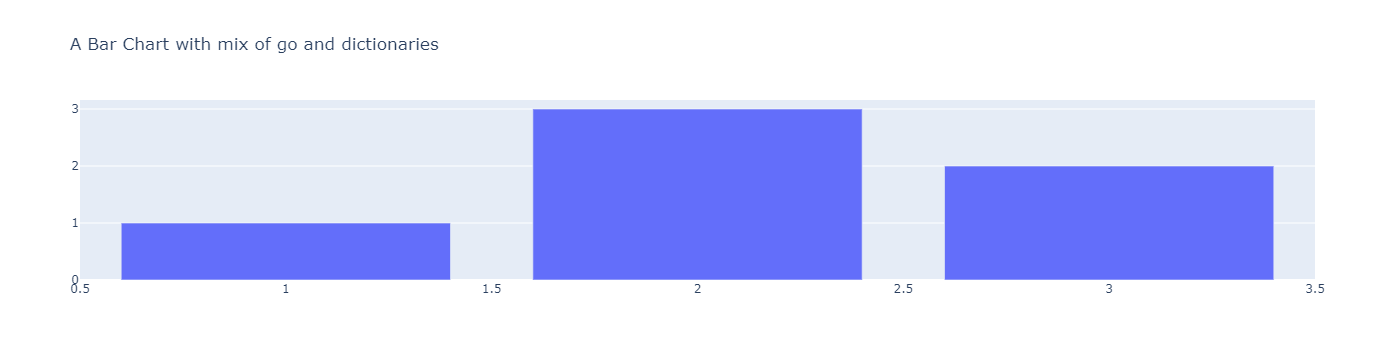

In [12]:
import plotly.graph_objects as go
fig = go.Figure(
    {"data": [{"type": "bar", 
                  "x": [1,2,3], 
                  "y":[1,3,2]}],
     "layout": {"title": {"text": "A Bar Chart with mix of go and dictionaries"}}
     })
fig.show()

After creation of the graph object, you can retrieve the dictionary representation using `fig.to_dict()` method or `fig.to_json()` method

In [13]:
keys = ['data', 'layout', 'bar']
# fig.to_dict() # shows a large number of key value pairs

In [14]:
import plotly.express as px
df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


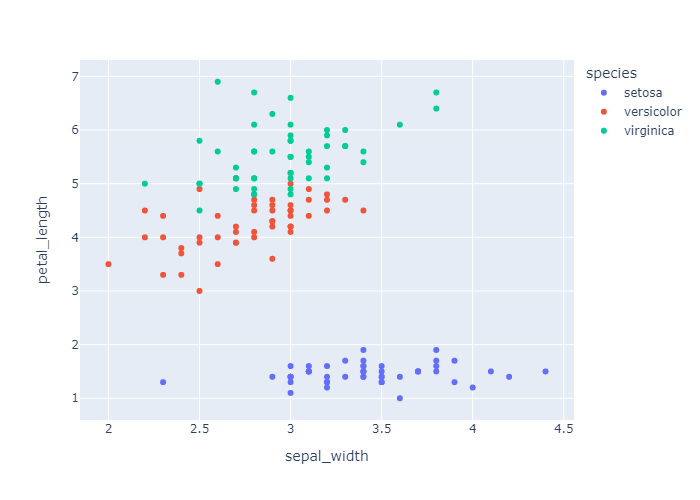

In [15]:
fig = px.scatter(df, x="sepal_width", y="petal_length", color="species")
fig.show('png')

In [16]:
import numpy as np
import plotly.figure_factory as ff
x1, y1 = np.meshgrid(np.arange(0, 2, 0.2), np.arange(0, 2, 0.2))
u1 = np.cos(x1)*y1
v1 = np.sin(x1)*y1

x1, y1

(array([[0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]]),
 array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
        [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
        [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
        [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
        [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
        [1.2, 1.2, 1.2, 1.2, 1.2, 1.2,